#AIM: TO DTERMINE THE FACTORS/FEATURES THAT HAVE SOME KIND OF CORRELATION TO GROSS EARNING OF MOVIES 

In [1]:
# IMPORT THE PACKAGES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [3]:
# IMPORT THE DATA AND READ THE DATA

df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",0.0,0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120


In [149]:
# TAKE A LOOK AT THE DATA

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",0.0,0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [150]:
# CHECK FOR MISSING DATA

for col in df.columns:
    percentmissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(percentmissing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [152]:
# CHECK DATA TYPES OF COLUMNS

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

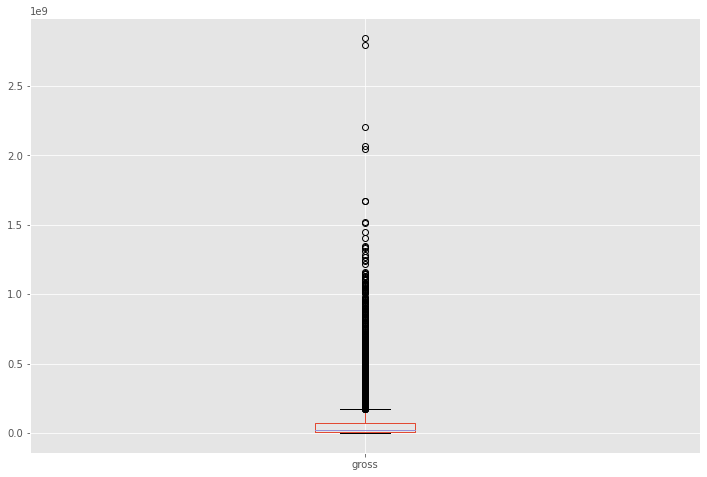

In [153]:
# CHECK FOR OUTLIERS

df.boxplot(column=['gross'])

In [154]:
# CHANGE DATA TYPES OF BUDGET AND GROSS FROM FLOAT TO INTEGER 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['gross']

0        46998772
1        58853106
2       538375067
3        83453539
4        39846344
          ...    
7663            0
7664            0
7665            0
7666            0
7667            0
Name: gross, Length: 7668, dtype: int64

In [156]:
# FIND MAXIMUM GROSS EARNING

max(df['gross'])

2847246203

In [157]:
#SORT DATA FOR BETTER UNDERSTANDING

df = df.sort_values(by=['gross'],inplace = False, ascending = False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


In [158]:
# FIND CORRELATION

df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.094431,0.224163,0.309212,0.261900,0.116358
score,0.094431,1.000000,0.405855,0.056909,0.185748,0.391261
votes,0.224163,0.405855,1.000000,0.487887,0.634083,0.305972
budget,0.309212,0.056909,0.487887,1.000000,0.750157,0.268372
gross,0.261900,0.185748,0.634083,0.750157,1.000000,0.244339
runtime,0.116358,0.391261,0.305972,0.268372,0.244339,1.000000


In [159]:
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067323,0.330930,0.209304,0.216595,0.096390
score,0.067323,1.000000,0.300675,-0.004961,0.091144,0.283103
votes,0.330930,0.300675,1.000000,0.439765,0.560264,0.197206
budget,0.209304,-0.004961,0.439765,1.000000,0.541956,0.176184
gross,0.216595,0.091144,0.560264,0.541956,1.000000,0.177429
runtime,0.096390,0.283103,0.197206,0.176184,0.177429,1.000000


In [160]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.098526,0.468874,0.291152,0.314681,0.141805
score,0.098526,1.000000,0.428810,-0.007170,0.133290,0.399138
votes,0.468874,0.428810,1.000000,0.604524,0.752275,0.288630
budget,0.291152,-0.007170,0.604524,1.000000,0.716816,0.246941
gross,0.314681,0.133290,0.752275,0.716816,1.000000,0.257478
runtime,0.141805,0.399138,0.288630,0.246941,0.257478,1.000000


### WE WILL BE MOVING FORWARD WITH PEARSON METHOD

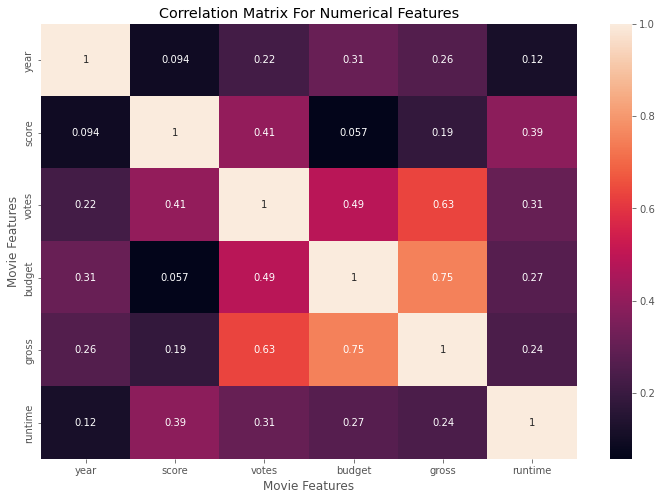

In [162]:
#CORRELATION MATRIX PLOT

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Matrix For Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

###HIGH CORRELATION BETWEEN VOTES-GROSS AND BUDGET-GROSS

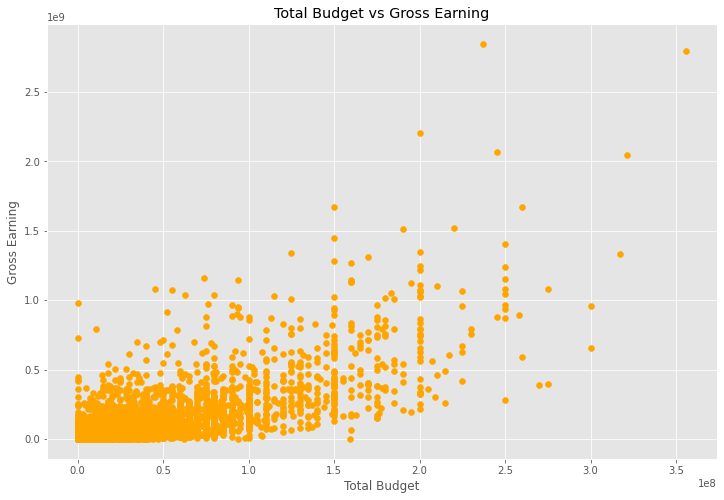

In [165]:
#SCATTER PLOT OF BUDGET VS GROSS EARNING

plt.scatter(x = df['budget'], y = df['gross'],color = 'orange')
plt.title('Total Budget vs Gross Earning')
plt.xlabel('Total Budget')
plt.ylabel('Gross Earning')

plt.show()

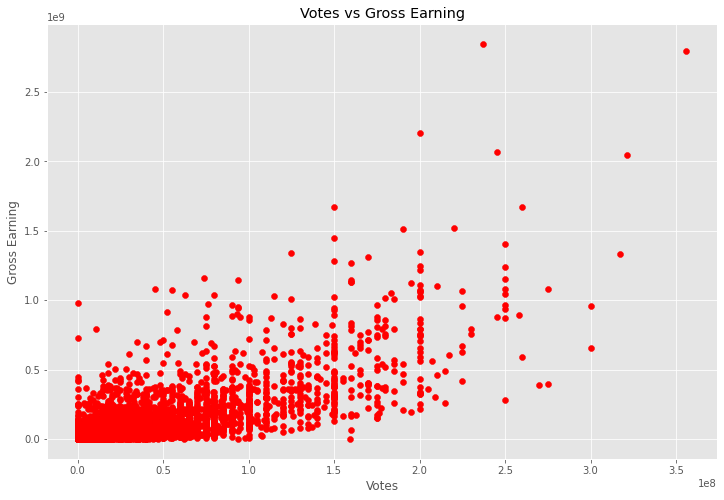

In [166]:
#SCATTER PLOT OF VOTES VS GROSS EARNING

plt.scatter(x = df['budget'], y = df['gross'], color = 'red')
plt.title('Votes vs Gross Earning')
plt.xlabel('Votes')
plt.ylabel('Gross Earning')

plt.show()

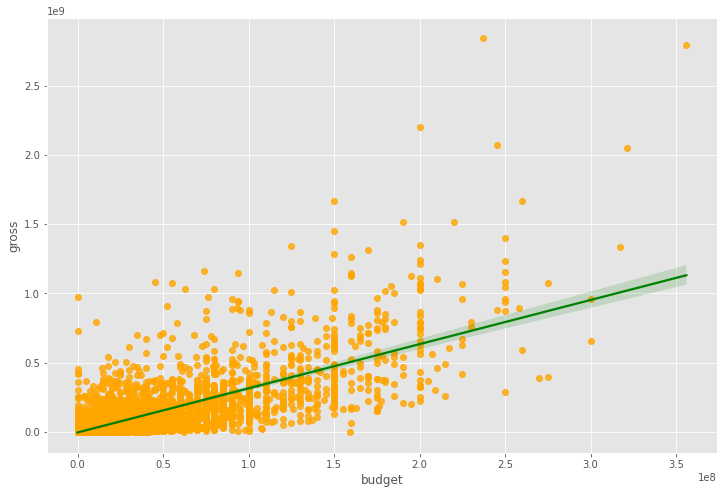

In [167]:
# REGESSION PLOT OF BUDGET VS GROSS EARNING

sns.regplot(x = df['budget'], y = df['gross'], scatter_kws = {'color':'orange'}, line_kws = {'color':'green'})

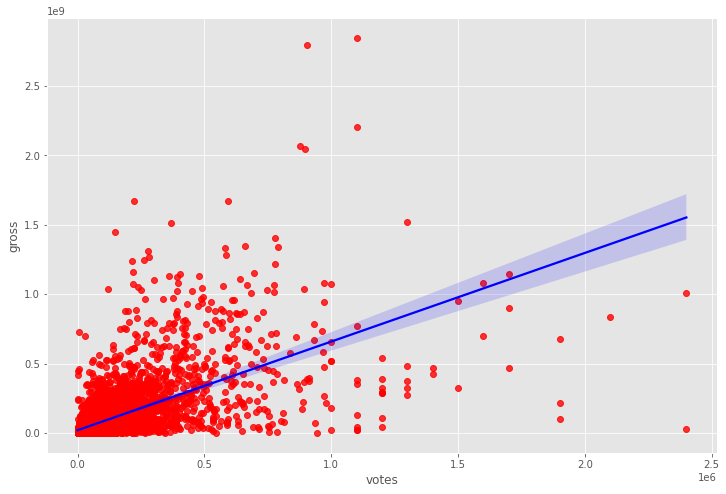

In [168]:
# REGRESSION PLOT OF PLOT VOTES VS GROSS EARNING

sns.regplot(x = df['votes'], y = df['gross'], scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

In [169]:
#ASSIGN NUMERIC CATEGORIES TO OBJECT DATA TYPES FOR CHECKING CORRELATION

df_numerized = df
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274,117,82,2797,55,0,0,1159,92
1614,1745,6,10,1989,55,5.2,1300,1033,1743,166,54,0,0,146,85
1606,2691,6,8,1989,257,6.0,2900,2743,946,1195,6,0,0,2237,89
1601,3836,-1,4,1989,1160,7.1,1500,1105,1696,681,18,0,0,504,104


In [170]:
# SORT NEW DATA FRAME

df = df.sort_values(by=['gross'],inplace = False, ascending = False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,7211,6,3,1987,845,6.6,3300,66,3780,701,55,5800000,0,1323,94
1199,7208,4,4,1987,83,4.8,1400,1877,3645,462,55,0,0,1637,86
1192,7336,6,10,1987,1754,6.2,2200,745,682,596,54,0,0,1681,110
1184,1355,6,10,1987,2914,4.0,2100,613,925,1627,55,75000,0,2219,72


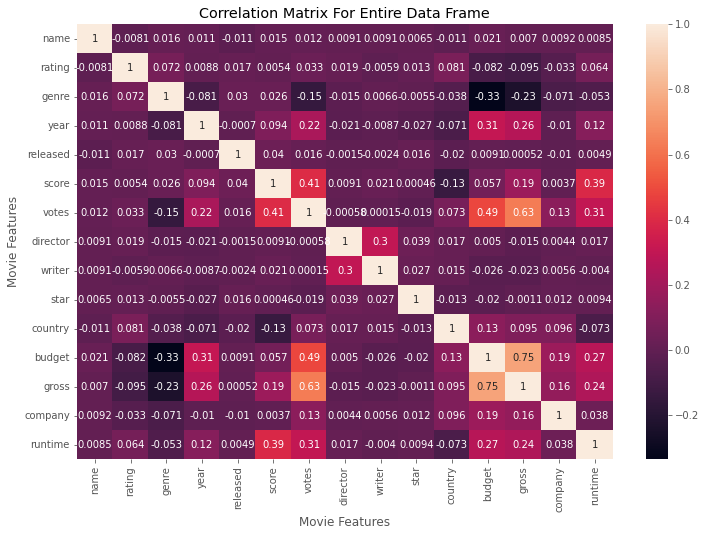

In [171]:
#PLOT CORRELATION MATRIX OF NEW FEATURES

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Matrix For Entire Data Frame')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [174]:
#CHECK FOR CORRELATION IN THE NEW DATA FRAME

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.014873,0.012090,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.005434,0.033309,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.026356,-0.146180,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.094431,0.224163,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039707,0.015901,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852
score,0.014873,0.005434,0.026356,0.094431,0.039707,1.000000,0.405855,0.009137,0.020569,0.000464,-0.133428,0.056909,0.185748,0.003651,0.391261
votes,0.012090,0.033309,-0.146180,0.224163,0.015901,0.405855,1.000000,-0.000581,0.000152,-0.018854,0.073375,0.487887,0.634083,0.132744,0.305972
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009137,-0.000581,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.020569,0.000152,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,0.000464,-0.018854,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418


In [175]:
# UNSTACK THE CORRELATION MATRIX

correlationmatrix = df_numerized.corr()
correlationpairs = correlationmatrix.unstack()
correlationpairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.073319
         budget      0.268372
         gross       0.244339
         company     0.037537
         runtime     1.000000
Length: 225, dtype: float64

In [176]:
# SORT THE NEW UNSTACKED CORRELATION MATRIX

sortedpairs = correlationpairs.sort_values(ascending = False)
print(sortedpairs)

name     name       1.000000
rating   rating     1.000000
company  company    1.000000
gross    gross      1.000000
budget   budget     1.000000
                      ...   
genre    votes     -0.146180
         gross     -0.234297
gross    genre     -0.234297
genre    budget    -0.334021
budget   genre     -0.334021
Length: 225, dtype: float64


In [177]:
# FIND IF THERE'S HIGH CORRELATION IN THE SORTED UNSTACKED CORRELATION MATRIX

highcorrelation = sortedpairs[(sortedpairs)>0.5]
highcorrelation

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
budget    gross       0.750157
gross     budget      0.750157
votes     gross       0.634083
gross     votes       0.634083
dtype: float64

#HIGHEST CORRELATION IS BETWEEN:
# 1. BUDGET AND GROSS EARNING
# 2. VOTES AND GROSS EARNING 